<a href="https://colab.research.google.com/github/Nizamuddin96/Climate-Trends-in-the-PassuBatura-Glacier-Zone-and-Central-Hunza-Valley-2014--2024-/blob/main/linear_regression_on_climate_change_in_passu_batura_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1000x500 with 0 Axes>

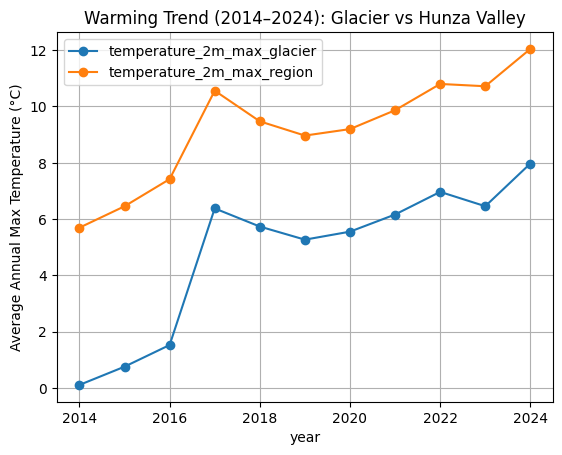

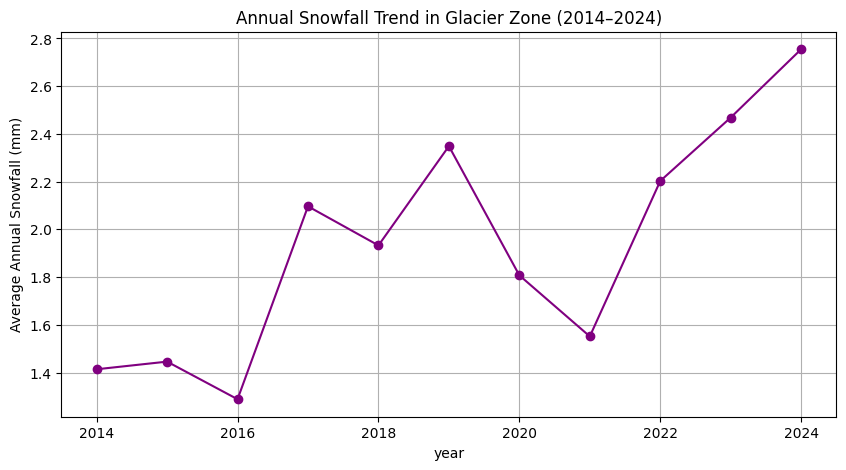

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression

# ---------------------------
# 1) Download Glacier Weather Data (Passu/Batura Zone)
# ---------------------------
lat_glacier = 36.4622
lon_glacier = 74.8652

url = "https://archive-api.open-meteo.com/v1/archive"

params_glacier = {
    "latitude": lat_glacier,
    "longitude": lon_glacier,
    "start_date": "2014-01-01",
    "end_date": "2024-12-31",
    "daily": [
        "temperature_2m_max",
        "temperature_2m_min",
        "precipitation_sum",
        "snowfall_sum"
    ],
    "timezone": "Asia/Karachi"
}

response = requests.get(url, params=params_glacier)
df_glacier = pd.DataFrame(response.json()["daily"])
df_glacier.to_csv("passu_batura_weather_2014_2024.csv", index=False)


# ---------------------------
# 2) Download Regional Weather Data (Central Hunza / Aliabad)
# ---------------------------
lat_hunza = 36.3108
lon_hunza = 74.6155

params_region = {
    "latitude": lat_hunza,
    "longitude": lon_hunza,
    "start_date": "2014-01-01",
    "end_date": "2024-12-31",
    "daily": [
        "temperature_2m_max",
        "temperature_2m_min",
        "precipitation_sum"
    ],
    "timezone": "Asia/Karachi"
}

response = requests.get(url, params=params_region)
df_region = pd.DataFrame(response.json()["daily"])
df_region.to_csv("hunza_central_weather_2014_2024.csv", index=False)


# ---------------------------
# 3) Merge Datasets
# ---------------------------
df_glacier['time'] = pd.to_datetime(df_glacier['time'])
df_region['time'] = pd.to_datetime(df_region['time'])

df_merged = pd.merge(df_glacier, df_region, on='time', suffixes=('_glacier', '_region'))

df_merged['year'] = df_merged['time'].dt.year


# ---------------------------
# 4) Calculate Yearly Climate Trends
# ---------------------------
annual_trend = df_merged.groupby('year')[['temperature_2m_max_glacier',
                                          'temperature_2m_max_region']].mean()

snow_trend = df_merged.groupby('year')['snowfall_sum'].mean()


# ---------------------------
# 5) Plot Climate Change Indicators
# ---------------------------
plt.figure(figsize=(10,5))
annual_trend.plot(marker='o')
plt.title("Warming Trend (2014–2024): Glacier vs Hunza Valley")
plt.ylabel("Average Annual Max Temperature (°C)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
snow_trend.plot(marker='o', color="purple")
plt.title("Annual Snowfall Trend in Glacier Zone (2014–2024)")
plt.ylabel("Average Annual Snowfall (mm)")
plt.grid(True)
plt.show()

In [ ]:
df_merged['avg_temp_glacier'] = (df_merged['temperature_2m_max_glacier'] + df_merged['temperature_2m_min_glacier']) / 2
df_merged['avg_temp_region'] = (df_merged['temperature_2m_max_region'] + df_merged['temperature_2m_min_region']) / 2

df_merged['temp_difference'] = df_merged['avg_temp_region'] - df_merged['avg_temp_glacier']


In [ ]:
# Create yearly column
df_merged['year'] = df_merged['time'].dt.year

# Calculate average daily temperature
df_merged['avg_temp_glacier'] = (df_merged['temperature_2m_max_glacier'] + df_merged['temperature_2m_min_glacier']) / 2
df_merged['avg_temp_region'] = (df_merged['temperature_2m_max_region'] + df_merged['temperature_2m_min_region']) / 2



In [ ]:
yearly_trends = df_merged.groupby('year').agg({
    'avg_temp_glacier': 'mean',
    'avg_temp_region': 'mean',
    'snowfall_sum': 'sum',
    'precipitation_sum_region': 'sum'
}).reset_index()

yearly_trends

,year,avg_temp_glacier,avg_temp_region,snowfall_sum,precipitation_sum_region
0,2014,-5.086712,0.686712,516.04,756.2
1,2015,-4.280685,1.563151,527.73,859.0
2,2016,-3.671858,2.333880,471.52,763.4
3,2017,3.096301,7.380548,765.24,1187.4
4,2018,2.617123,6.640822,705.46,1032.8
5,2019,2.233836,6.244658,857.29,1301.4
6,2020,2.561475,6.297404,661.50,1147.3
7,2021,2.688630,6.800137,566.30,917.3
8,2022,3.527397,7.484384,804.02,1211.3
9,2023,3.156027,7.091918,901.04,1024.6


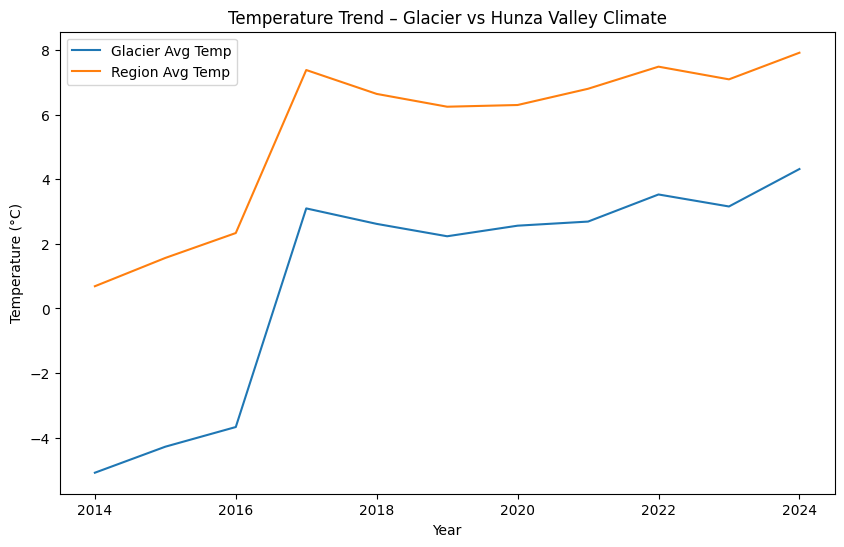

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(yearly_trends['year'], yearly_trends['avg_temp_glacier'], label='Glacier Avg Temp')
plt.plot(yearly_trends['year'], yearly_trends['avg_temp_region'], label='Region Avg Temp')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend – Glacier vs Hunza Valley Climate')
plt.legend()
plt.show()

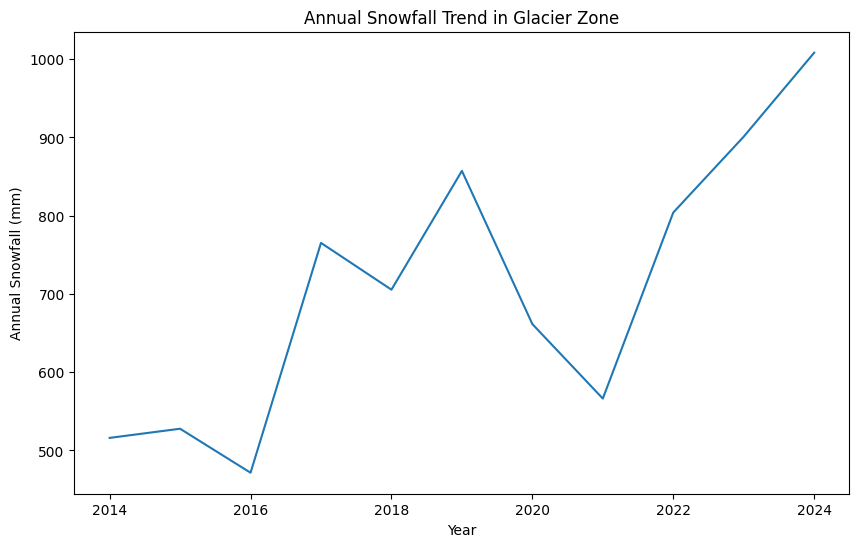

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(yearly_trends['year'], yearly_trends['snowfall_sum'])
plt.xlabel('Year')
plt.ylabel('Annual Snowfall (mm)')
plt.title('Annual Snowfall Trend in Glacier Zone')
plt.show()

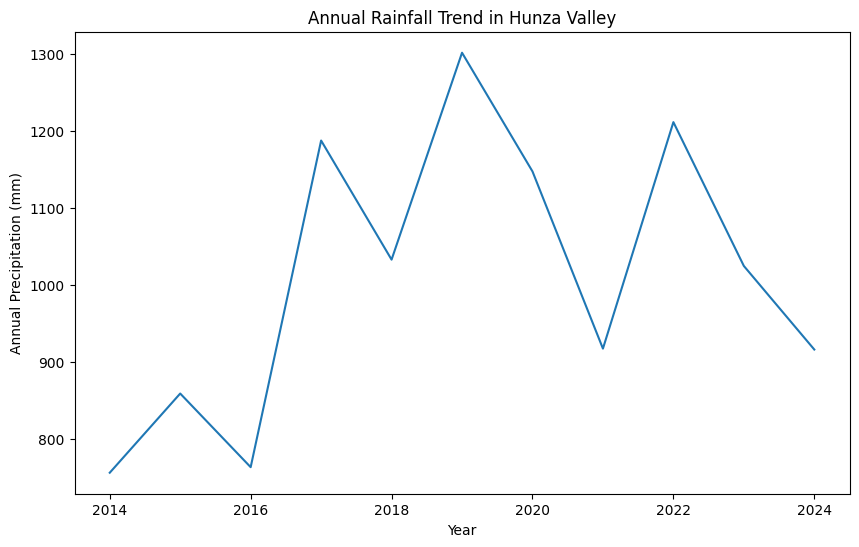

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(yearly_trends['year'], yearly_trends['precipitation_sum_region'])
plt.xlabel('Year')
plt.ylabel('Annual Precipitation (mm)')
plt.title('Annual Rainfall Trend in Hunza Valley')
plt.show()

In [ ]:
correlation = df_merged[['avg_temp_glacier','snowfall_sum','precipitation_sum_region']].corr()
correlation

,avg_temp_glacier,snowfall_sum,precipitation_sum_region
avg_temp_glacier,1.000000,-0.057939,0.099295
snowfall_sum,-0.057939,1.000000,0.657954
precipitation_sum_region,0.099295,0.657954,1.000000


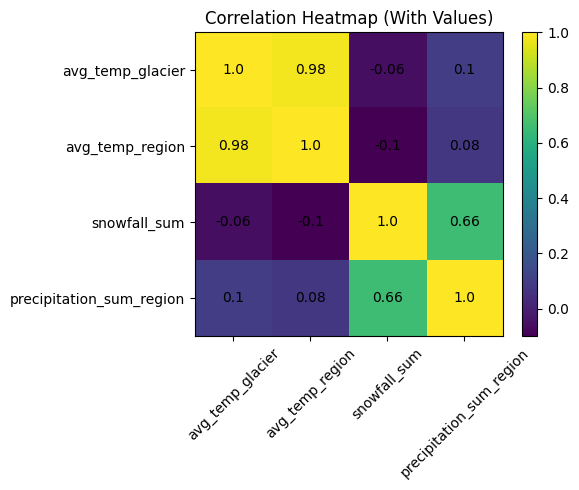

In [ ]:
# Select numeric columns for correlation# Compute correlation
corr = df_merged[['avg_temp_glacier', 'avg_temp_region', 'snowfall_sum', 'precipitation_sum_region']].corr().round(2)

plt.figure(figsize=(6, 5))
plt.imshow(corr, aspect='auto')
plt.colorbar()

# Tick labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

# Add correlation values on the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, corr.iloc[i, j], ha='center', va='center')

plt.title("Correlation Heatmap (With Values)")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate slope for temperature & snowfall
coeff_glacier = np.polyfit(yearly_trends['year'], yearly_trends['avg_temp_glacier'], 1)
coeff_region = np.polyfit(yearly_trends['year'], yearly_trends['avg_temp_region'], 1)
coeff_snowfall = np.polyfit(yearly_trends['year'], yearly_trends['snowfall_sum'], 1)

glacier_rate = coeff_glacier[0]
region_rate = coeff_region[0]
snowfall_rate = coeff_snowfall[0]

print("Glacier temperature change per year:", glacier_rate, "°C/year")
print("Regional temperature change per year:", region_rate, "°C/year")
print("Snowfall change per year:", snowfall_rate, "mm/year")

Glacier temperature change per year: 0.8862153536260955 °C/year
Regional temperature change per year: 0.6564489074440841 °C/year
Snowfall change per year: 41.00090909090983 mm/year


GLACIER TEMP: slope = 0.8862 °C/yr  | per-decade = 8.862 °C/decade | R2 = 0.705 | p = 0.001 | SE = 0.1913
REGION TEMP:  slope = 0.6564 °C/yr  | per-decade = 6.564 °C/decade | R2 = 0.690 | p = 0.002 | SE = 0.1467
SNOWFALL:     slope = 41.0009 mm/yr | per-decade = 410.0 mm/decade | R2 = 0.597 | p = 0.005 | SE = 11.2283
Saved: trend_summary_stats.csv


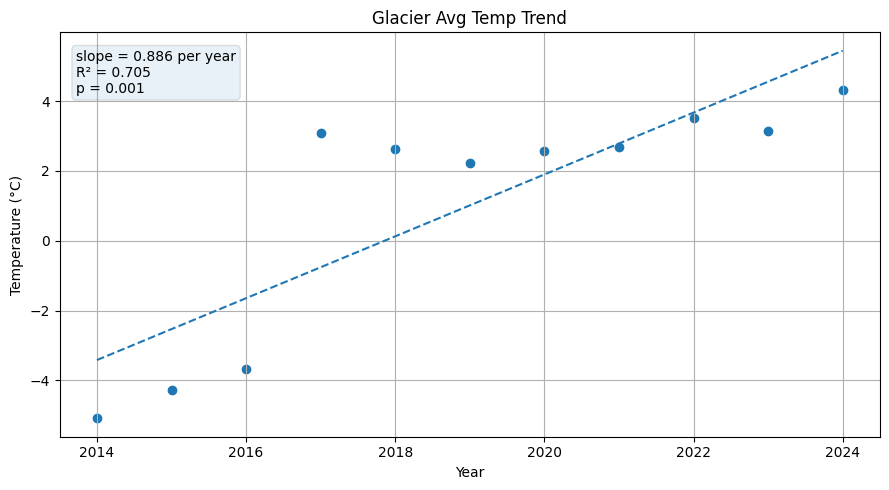

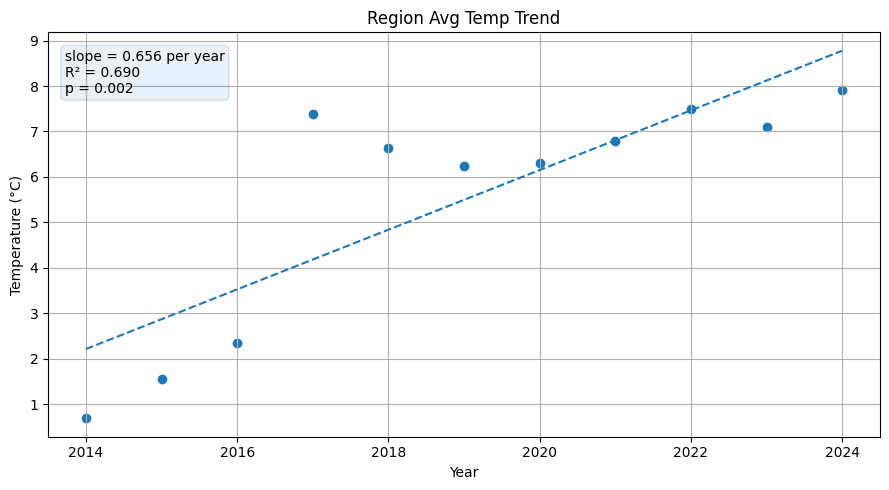

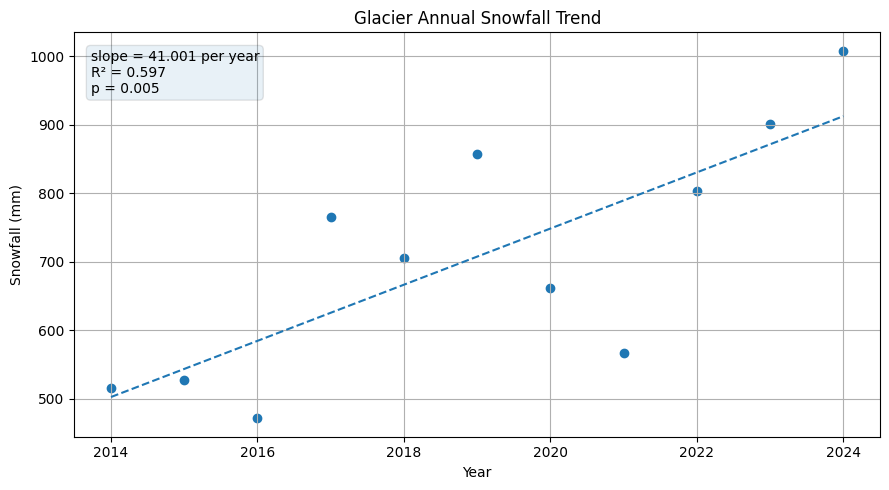

Saved plots: glacier_temp_trend.png, region_temp_trend.png, snowfall_trend.png


In [ ]:


# Prepare arrays
x = yearly_trends['year'].values
def linreg_stats(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return dict(slope=slope, intercept=intercept, r=r_value, p=p_value, se=std_err, r2=r_value**2)

# 1) Glacier avg temp
y_gl = yearly_trends['avg_temp_glacier'].values
res_gl = linreg_stats(x, y_gl)
decade_gl = res_gl['slope'] * 10

# 2) Region avg temp
y_reg = yearly_trends['avg_temp_region'].values
res_reg = linreg_stats(x, y_reg)
decade_reg = res_reg['slope'] * 10

# 3) Snowfall (glacier)
y_snow = yearly_trends['snowfall_sum'].values
res_snow = linreg_stats(x, y_snow)
decade_snow = res_snow['slope'] * 10

# Print summary
print("GLACIER TEMP: slope = {:.4f} °C/yr  | per-decade = {:.3f} °C/decade | R2 = {:.3f} | p = {:.3f} | SE = {:.4f}"
      .format(res_gl['slope'], decade_gl, res_gl['r']**2, res_gl['p'], res_gl['se']))
print("REGION TEMP:  slope = {:.4f} °C/yr  | per-decade = {:.3f} °C/decade | R2 = {:.3f} | p = {:.3f} | SE = {:.4f}"
      .format(res_reg['slope'], decade_reg, res_reg['r']**2, res_reg['p'], res_reg['se']))
print("SNOWFALL:     slope = {:.4f} mm/yr | per-decade = {:.1f} mm/decade | R2 = {:.3f} | p = {:.3f} | SE = {:.4f}"
      .format(res_snow['slope'], decade_snow, res_snow['r']**2, res_snow['p'], res_snow['se']))

# Save numeric summary
summary = pd.DataFrame([
    {"variable":"avg_temp_glacier", "slope_per_year":res_gl['slope'], "slope_per_decade":decade_gl, "r2":res_gl['r']**2, "p":res_gl['p'], "se":res_gl['se']},
    {"variable":"avg_temp_region", "slope_per_year":res_reg['slope'], "slope_per_decade":decade_reg, "r2":res_reg['r']**2, "p":res_reg['p'], "se":res_reg['se']},
    {"variable":"snowfall_sum", "slope_per_year":res_snow['slope'], "slope_per_decade":decade_snow, "r2":res_snow['r']**2, "p":res_snow['p'], "se":res_snow['se']}
])
summary.to_csv("trend_summary_stats.csv", index=False)
print("Saved: trend_summary_stats.csv")

# Plot with regression lines
def plot_with_fit(x, y, res, ylabel, title, fname):
    plt.figure(figsize=(9,5))
    plt.scatter(x, y)
    # line
    xs = np.array([x.min(), x.max()])
    ys = res['intercept'] + res['slope']*xs
    plt.plot(xs, ys, linestyle='--')
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(title)
    # annotate
    ann = f"slope = {res['slope']:.3f} per year\nR² = {res['r']**2:.3f}\np = {res['p']:.3f}"
    plt.annotate(ann, xy=(0.02, 0.85), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", alpha=0.1))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(fname, dpi=200)
    plt.show()

# Prepare res objects to include intercept
res_gl['intercept'] = res_gl['intercept'] if 'intercept' in res_gl else np.polyfit(x, y_gl, 1)[1]
res_reg['intercept'] = res_reg['intercept'] if 'intercept' in res_reg else np.polyfit(x, y_reg, 1)[1]
res_snow['intercept'] = res_snow['intercept'] if 'intercept' in res_snow else np.polyfit(x, y_snow, 1)[1]

plot_with_fit(x, y_gl, res_gl, "Temperature (°C)", "Glacier Avg Temp Trend", "glacier_temp_trend.png")
plot_with_fit(x, y_reg, res_reg, "Temperature (°C)", "Region Avg Temp Trend", "region_temp_trend.png")
plot_with_fit(x, y_snow, res_snow, "Snowfall (mm)", "Glacier Annual Snowfall Trend", "snowfall_trend.png")

print("Saved plots: glacier_temp_trend.png, region_temp_trend.png, snowfall_trend.png")
